# EDA with Red wine Data

Data set information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Input variables

Input variables (based on physicochemical tests): <br>
   1 - fixed acidity<br>
   2 - volatile acidity<br>
   3 - citric acid<br>
   4 - residual sugar<br>
   5 - chlorides<br>
   6 - free sulfur dioxide<br>
   7 - total sulfur dioxide<br>
   8 - density<br>
   9 - pH<br>
   10 - sulphates<br>
   11 - alcohol<br>
Output variable (based on sensory data):<br> 
   12 - quality (score between 0 and 10)<br>



# Red Wine Quality - Exploratory Data Analysis (EDA)

This project performs a complete exploratory data analysis on the **Red Wine Quality Dataset**.
The goal of the project is:

1. Understand the structure of the dataset
2. Clean the data (missing values, duplicates, datatypes)
3. Analyze distributions of all features
4. Detect skewness and outliers
5. Explore relationships between features and wine quality
6. Perform correlation analysis
7. Create feature engineering such as:
   - quality labels (low, medium, high)
   - log-transformed features for skewed data
8. Save the cleaned and engineered dataset for future ML tasks

Dataset Source: UCI Machine Learning Repository  
Rows: 1599  
Columns: 12  
Target variable: `quality`


In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [16]:
df = pd.read_csv('winequality-red.csv' , sep= (';'))

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df.shape 

(1599, 12)

In [19]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [20]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [22]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [23]:
df.duplicated().sum()

240

In [24]:
df = df.drop_duplicates().reset_index(drop = True)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [26]:
df.skew().sort_values(ascending = False)

chlorides               5.502487
residual sugar          4.548153
sulphates               2.406505
total sulfur dioxide    1.540368
free sulfur dioxide     1.226579
fixed acidity           0.941041
alcohol                 0.859841
volatile acidity        0.729279
citric acid             0.312726
pH                      0.232032
quality                 0.192407
density                 0.044778
dtype: float64

In [27]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

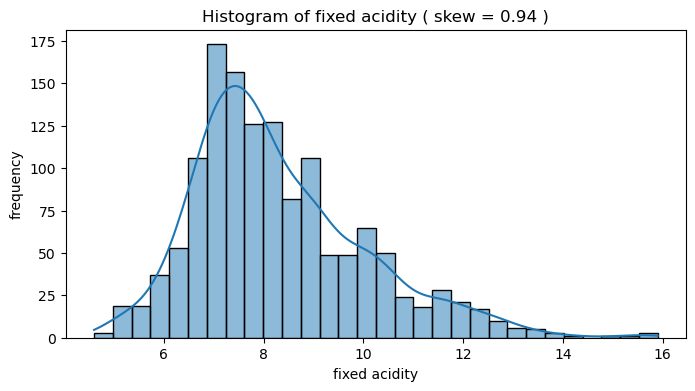

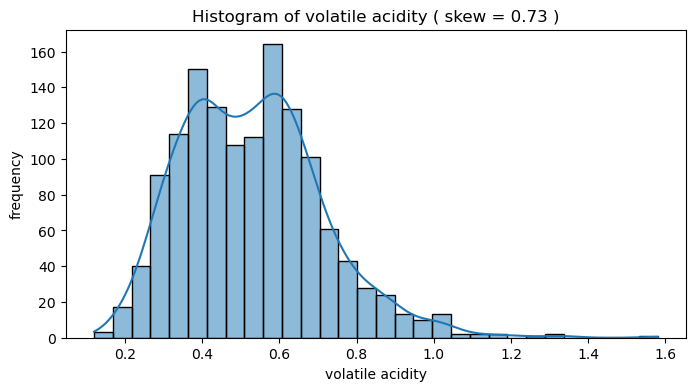

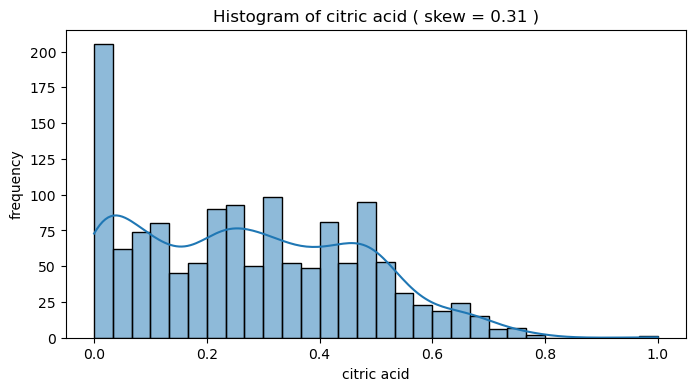

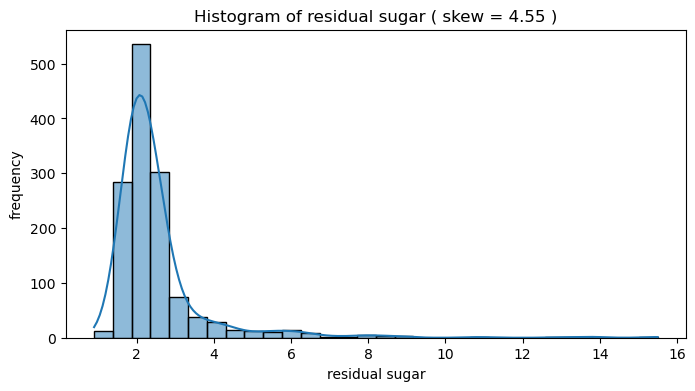

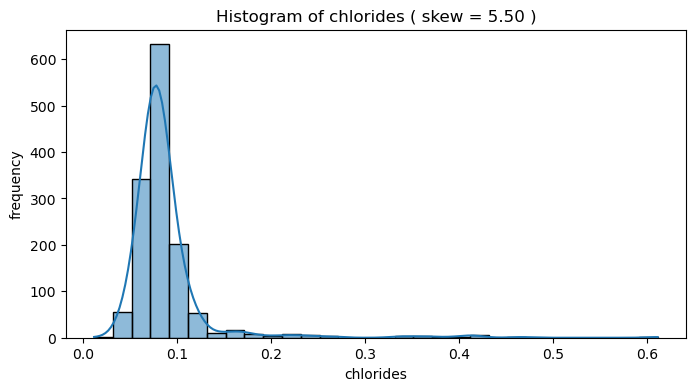

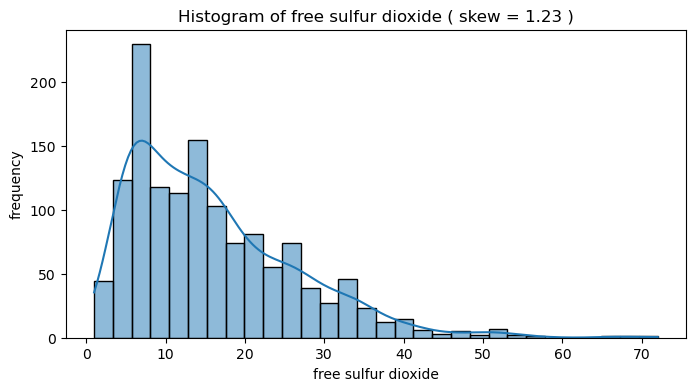

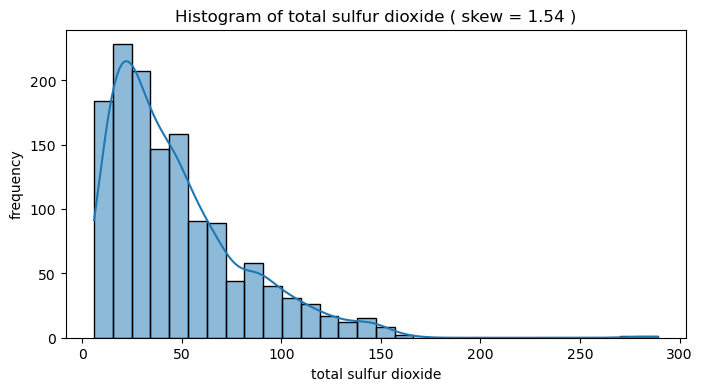

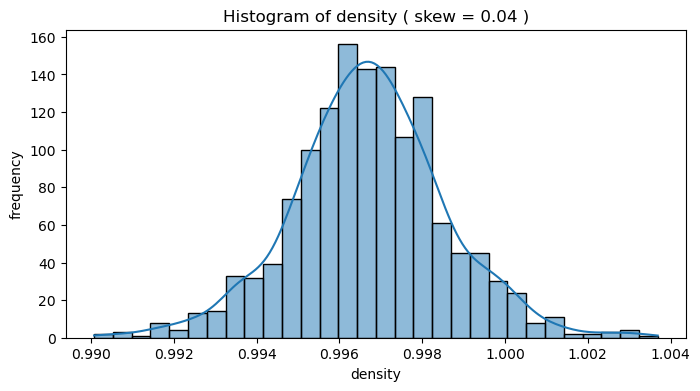

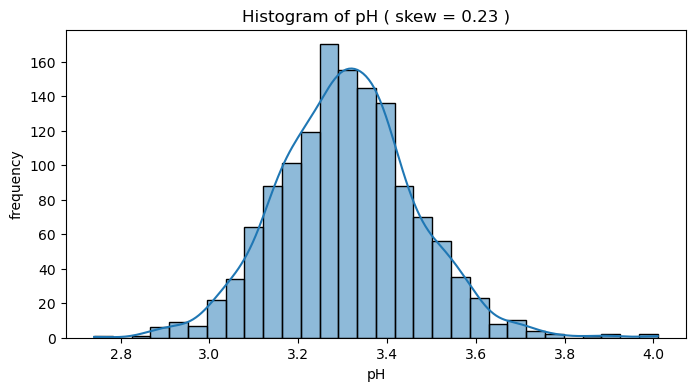

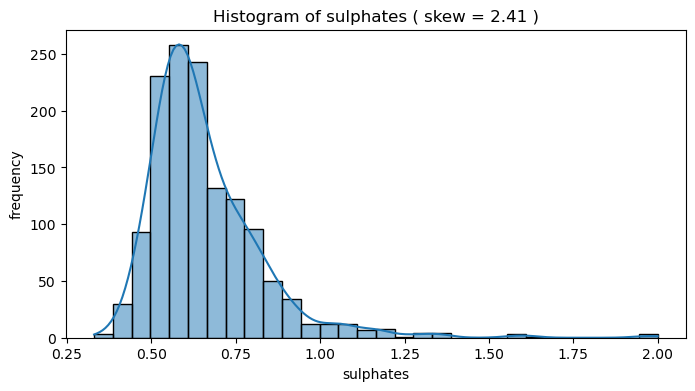

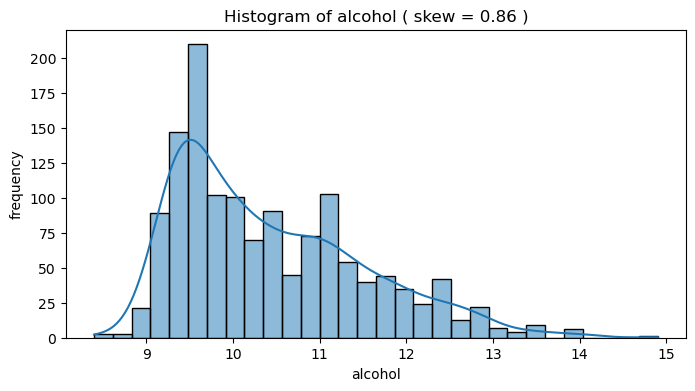

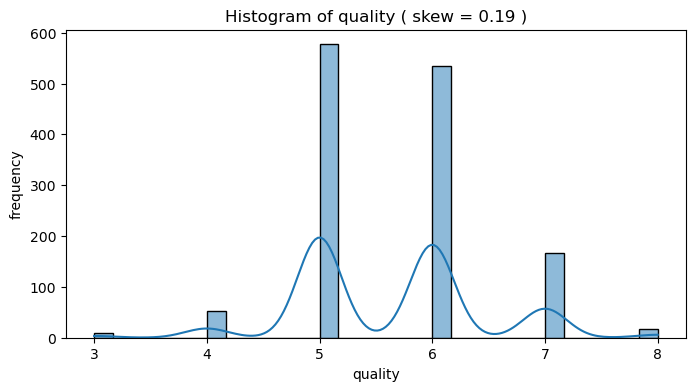

In [49]:
## here we are histplotting to check distribution & skewness

for col in numeric_cols:
    plt.figure(figsize = (8,4))
    sns.histplot(df[col] , kde = True , bins = 30)
    plt.title(f"Histogram of {col} ( skew = {df[col].skew():.2f} )")
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

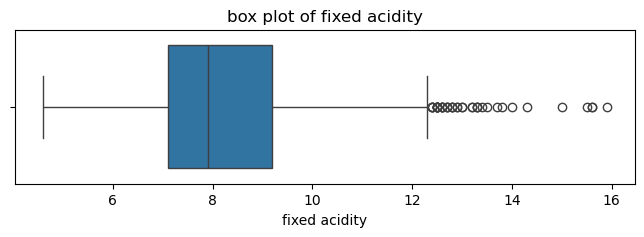

number of outlier in fixed acidity is 41
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


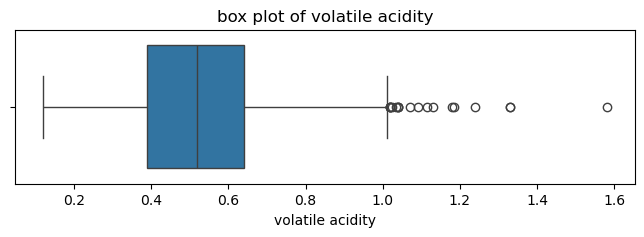

number of outlier in volatile acidity is 19
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


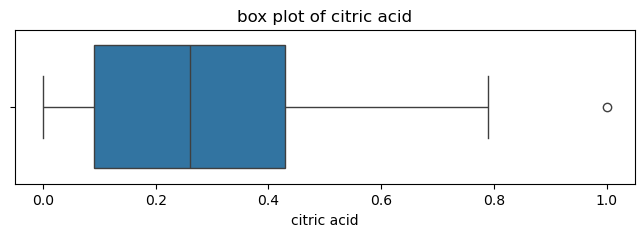

number of outlier in citric acid is 1
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


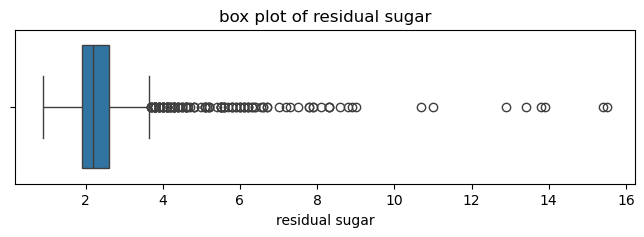

number of outlier in residual sugar is 126
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


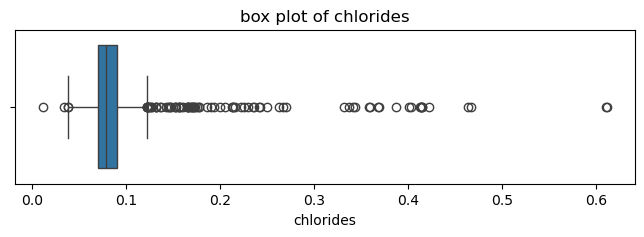

number of outlier in chlorides is 87
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


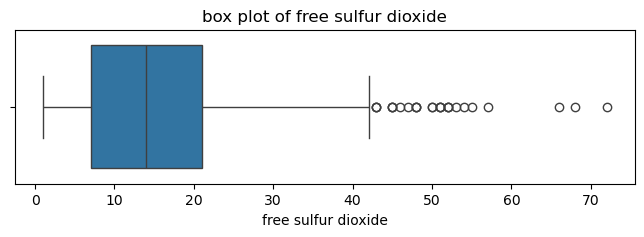

number of outlier in free sulfur dioxide is 26
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


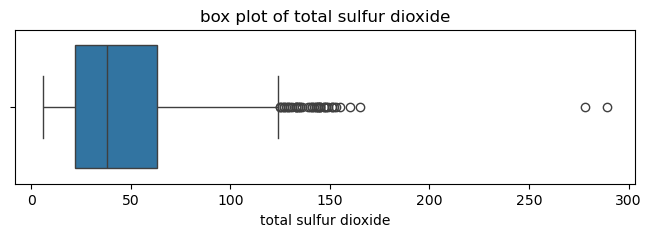

number of outlier in total sulfur dioxide is 45
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


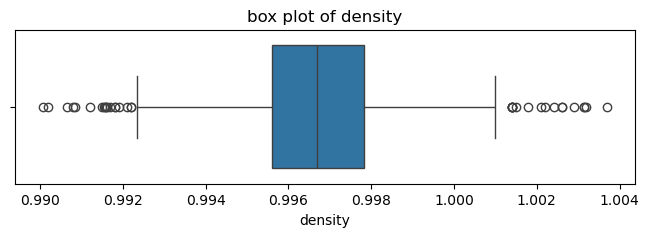

number of outlier in density is 35
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


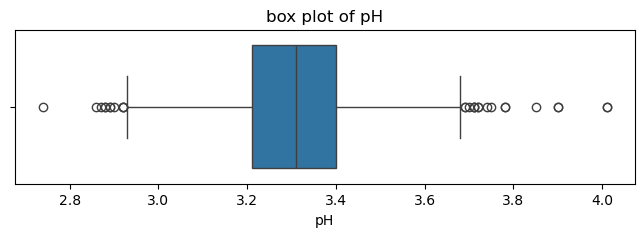

number of outlier in pH is 28
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


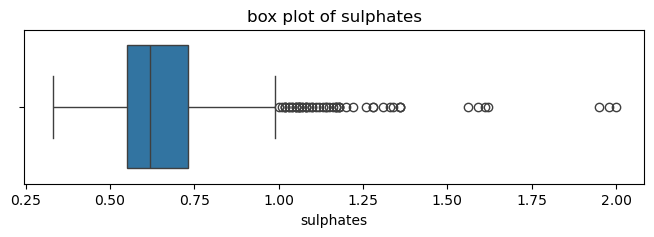

number of outlier in sulphates is 55
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


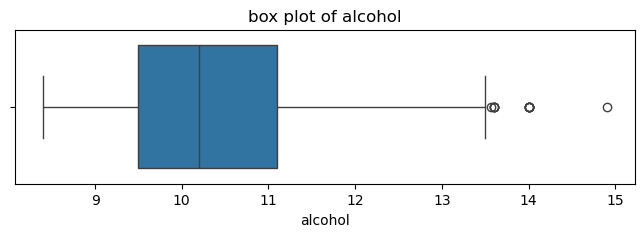

number of outlier in alcohol is 12
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


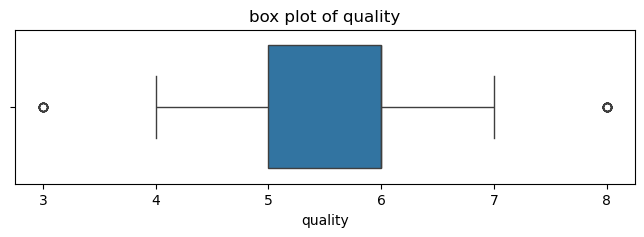

number of outlier in quality is 27
------------------------------------------------------------------------------------------------------------------------ ------------------------------------------------------------------------------------------------------------------------


In [29]:
## boxplots to check the outliers
for col in numeric_cols:
    plt.figure(figsize = (8,2))
    sns.boxplot(x=df[col])
    plt.title(f"box plot of {col}")
    plt.xlabel(col)
    plt.show()

    # #outlier detection using the IQR method
    #  # Outlier detection with IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df[col]< lower) | (df[col] > upper)).sum()

    print(f"number of outlier in {col} is {outliers}")
    print("--"*60, "--"*60)

In [30]:
## summary of the skewed column

skewcol = df.skew().sort_values(ascending = False)
print(skewcol)

chlorides               5.502487
residual sugar          4.548153
sulphates               2.406505
total sulfur dioxide    1.540368
free sulfur dioxide     1.226579
fixed acidity           0.941041
alcohol                 0.859841
volatile acidity        0.729279
citric acid             0.312726
pH                      0.232032
quality                 0.192407
density                 0.044778
dtype: float64


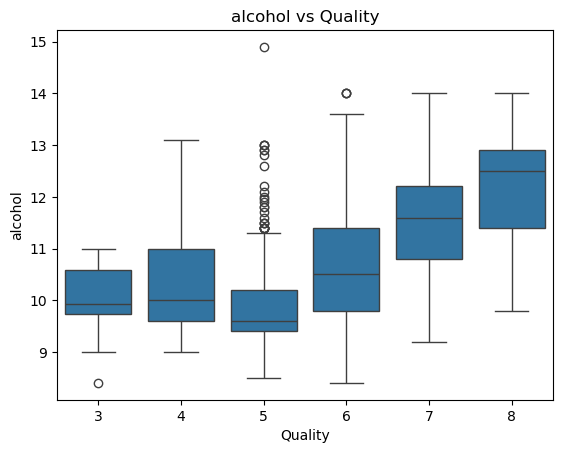

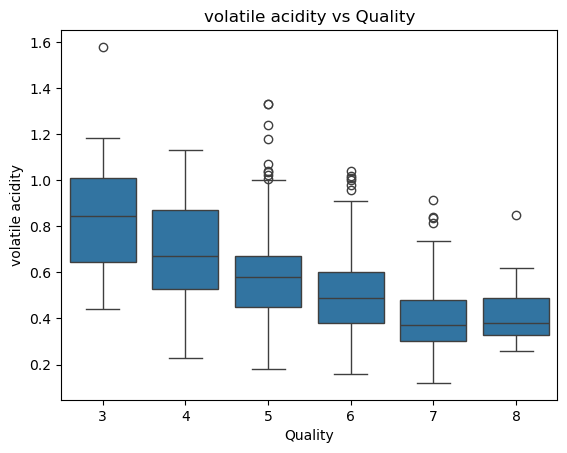

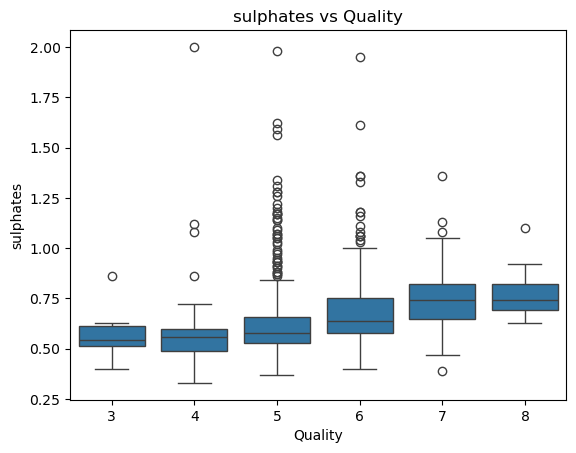

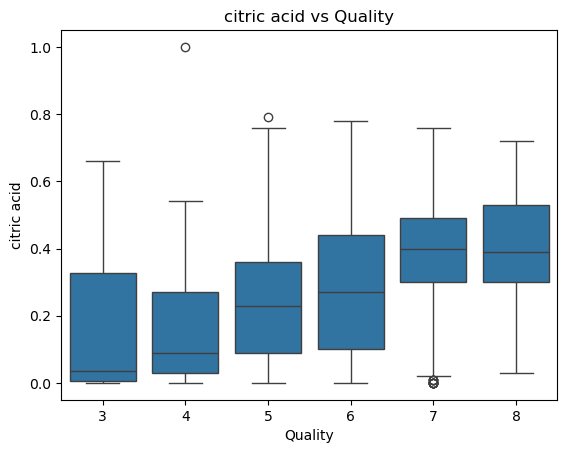

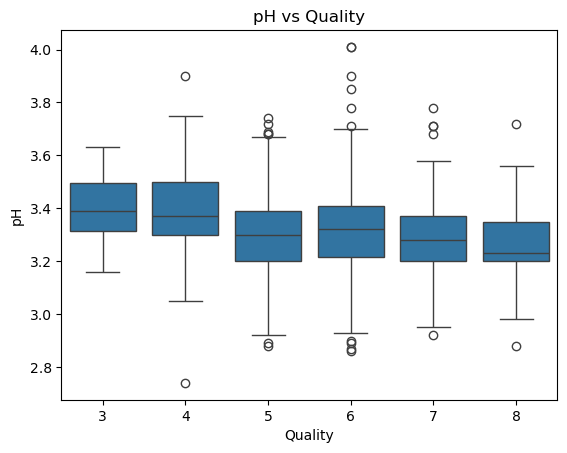

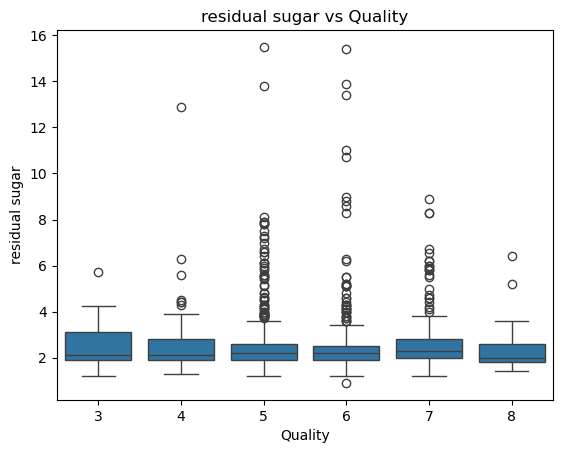

In [31]:
features = ["alcohol", "volatile acidity", "sulphates", 
            "citric acid", "pH", "residual sugar"]

for col in features:
    if col in df.columns:
        plt.figure()
        sns.boxplot(x=df["quality"], y=df[col])
        plt.title(f"{col} vs Quality")
        plt.xlabel("Quality")
        plt.ylabel(col)
        plt.show()




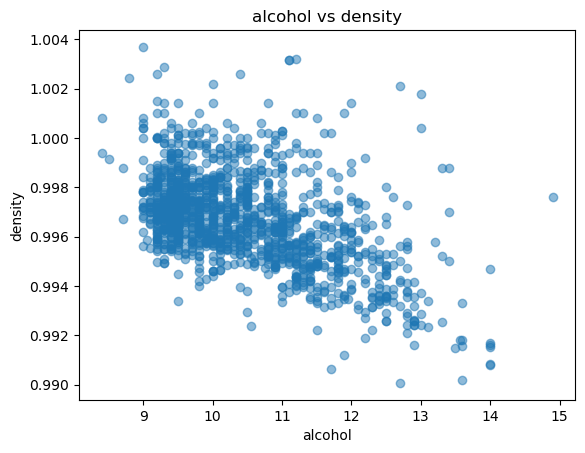

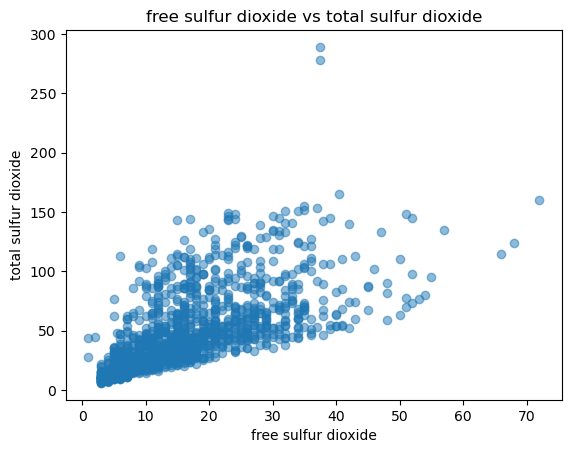

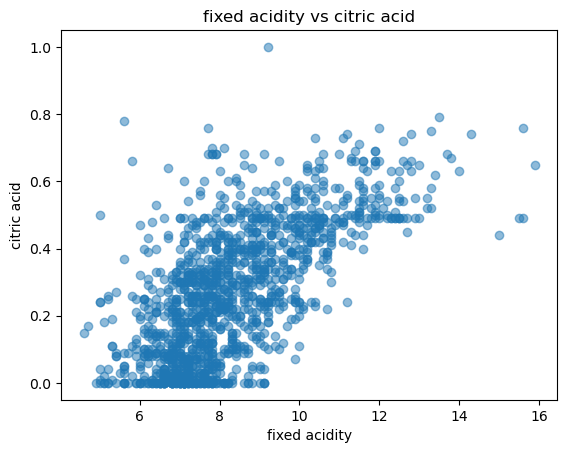

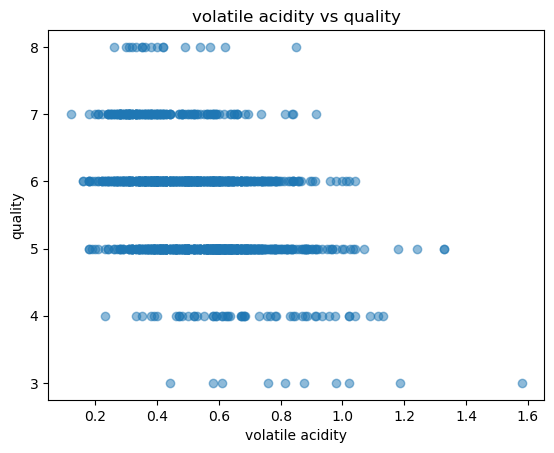

In [102]:
# 6.2 Scatter Plots — Relationship Between Features

pairs = [
    ("alcohol", "density"),
    ("free sulfur dioxide", "total sulfur dioxide"),
    ("fixed acidity", "citric acid"),
    ("volatile acidity", "quality"),
]

for x, y in pairs:
    if x in df.columns and y in df.columns:
        plt.figure()
        plt.scatter(df[x], df[y], alpha=0.5)
        plt.title(f"{x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

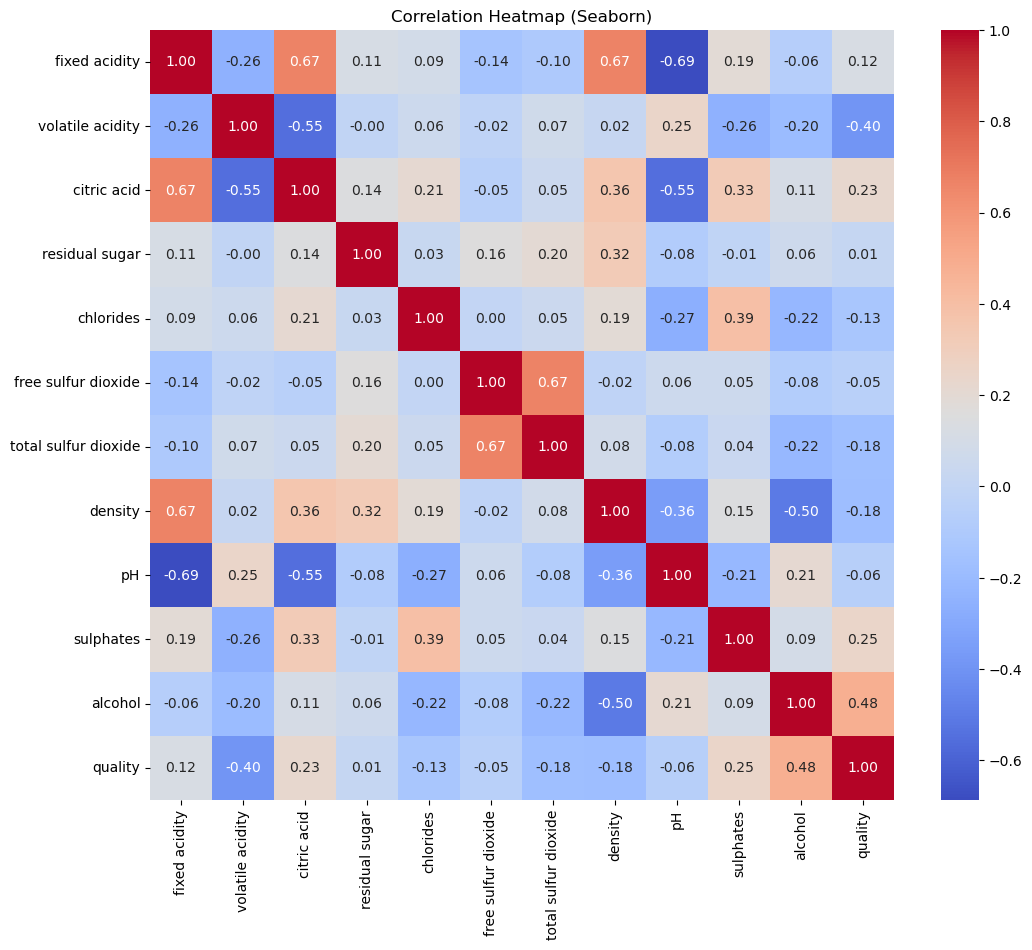

In [55]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Seaborn)")
plt.show()

In [57]:
def quality_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

df["quality_label"] = df["quality"].apply(quality_label)

print("Value counts for new quality_label column:")
display(df["quality_label"].value_counts())

Value counts for new quality_label column:


quality_label
medium    1112
high       184
low         63
Name: count, dtype: int64

In [61]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,medium


In [85]:
skew_vals = df.select_dtypes(include =[np.int64, np.float64]).skew().sort_values(ascending = False)
print("skewness before log tranformation :")
display(skew_vals)

skewness before log tranformation :


chlorides               5.502487
residual sugar          4.548153
sulphates               2.406505
total sulfur dioxide    1.540368
free sulfur dioxide     1.226579
fixed acidity           0.941041
alcohol                 0.859841
volatile acidity        0.729279
citric acid             0.312726
pH                      0.232032
quality                 0.192407
density                 0.044778
dtype: float64

In [113]:
skewed_cols = skew_vals[skew_vals > 1].index.tolist()
print("Columns selected for log transform:", skewed_cols)

# create new transformed columns
for col in skewed_cols:
    new_col = col + "_log1p"
    df[new_col] = np.log1p(df[col])
    print(f"Created transformed feature: {new_col}")

print("\nLog transformations completed.")

Columns selected for log transform: ['chlorides', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'free sulfur dioxide']
Created transformed feature: chlorides_log1p
Created transformed feature: residual sugar_log1p
Created transformed feature: sulphates_log1p
Created transformed feature: total sulfur dioxide_log1p
Created transformed feature: free sulfur dioxide_log1p

Log transformations completed.


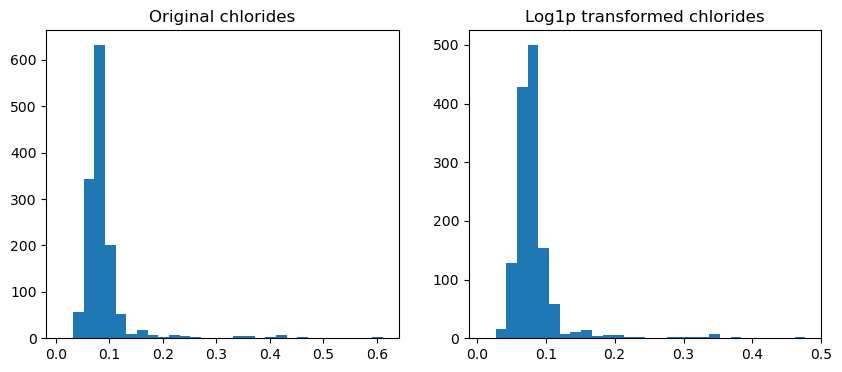

In [147]:
example = skewed_cols[0]  # any skewed feature
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df[example], bins=30)
plt.title(f"Original {example}")

plt.subplot(1,2,2)
plt.hist(df[example + '_log1p'], bins=30)
plt.title(f"Log1p transformed {example}")

plt.show()

In [149]:
print("Feature Engineering Summary:")
print("--------------------------------------------------")
print(f"Created 'quality_label' → categorical target")
print(f"Log transformed columns: {skewed_cols}")



Feature Engineering Summary:
--------------------------------------------------
Created 'quality_label' → categorical target
Log transformed columns: ['chlorides', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'free sulfur dioxide']


## Final Insights Summary




In [154]:
# %% 

print("===== FINAL PROJECT INSIGHTS — RED WINE QUALITY DATASET =====\n")

# 1) Shape
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}\n")

# 2) Missing values
missing = df.isnull().sum().sum()
print(f"Missing values: {missing} (Great — dataset is clean!)\n")

# 3) Duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates} (Consider dropping duplicates.)\n")

# 4) Basic distribution notes
print("📌 Distribution & Skewness Observations:")
for col in df.select_dtypes(include='number').columns:
    skew_val = df[col].skew()
    if skew_val > 1:
        print(f" - {col}: Strong RIGHT skew -> log transform recommended")
    elif skew_val < -1:
        print(f" - {col}: Strong LEFT skew -> consider transformation")
    else:
        print(f" - {col}: roughly normal/moderate skew")
print()

# 5) Outliers
print("📌 Outlier Summary (IQR Method):")
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f" - {col}: {outliers} outliers")
print()

# 6) Correlations
corr = df.corr(numeric_only=True)
strong_corr = corr[(corr.abs() > 0.5) & (corr.abs() < 1)].stack()

print("📌 Strong Correlations (>0.5):")
if len(strong_corr) == 0:
    print("No strong correlations found.")
else:
    for pair, value in strong_corr.items():
        print(f" - {pair}: {value:.2f}")
print()

# 7) Quality label distribution
print("📌 Quality Category Distribution:")
if "quality_label" in df.columns:
    print(df["quality_label"].value_counts(), "\n")

print("===== END OF SUMMARY =====")


===== FINAL PROJECT INSIGHTS — RED WINE QUALITY DATASET =====

Total rows: 1359
Total columns: 18

Missing values: 0 (Great — dataset is clean!)

Duplicate rows: 0 (Consider dropping duplicates.)

📌 Distribution & Skewness Observations:
 - fixed acidity: roughly normal/moderate skew
 - volatile acidity: roughly normal/moderate skew
 - citric acid: roughly normal/moderate skew
 - residual sugar: Strong RIGHT skew -> log transform recommended
 - chlorides: Strong RIGHT skew -> log transform recommended
 - free sulfur dioxide: Strong RIGHT skew -> log transform recommended
 - total sulfur dioxide: Strong RIGHT skew -> log transform recommended
 - density: roughly normal/moderate skew
 - pH: roughly normal/moderate skew
 - sulphates: Strong RIGHT skew -> log transform recommended
 - alcohol: roughly normal/moderate skew
 - quality: roughly normal/moderate skew
 - chlorides_log1p: Strong RIGHT skew -> log transform recommended
 - residual sugar_log1p: Strong RIGHT skew -> log transform reco

In [156]:
df.to_csv("winequality-red-processed.csv", index=False)
